In [1]:
import os

import mlflow
import pandas as pd
import tensorflow as tf
from src import utils
from src.features.dataset import (AugmentedImagesDatasetGenerator,
                                  configure_for_performance)
from src.models.get_model import get_model
from src.models.model_trainer import train_model

DATASETS_BASE = os.path.join(utils.DATA_PATH, "processed")


def get_dataset(split: str) -> tf.data.Dataset:

    annotations_path = os.path.join(DATASETS_BASE, split, "annotations.csv")
    annotations = pd.read_csv(annotations_path)

    images_path = os.path.join(DATASETS_BASE, split, "images")

    dataset_generator = AugmentedImagesDatasetGenerator(
        images_path=images_path,
        annotations=annotations
    )

    dataset = tf.data.Dataset.from_generator(
        dataset_generator.get_image,
        output_signature=(tf.TensorSpec(shape=(256, 256, 3)), tf.TensorSpec(shape=(4, )))
    )

    dataset = configure_for_performance(dataset)

    return dataset

2023-01-05 18:37:05.191404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 18:37:05.316214: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-05 18:37:05.320217: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-05 18:37:05.320233: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

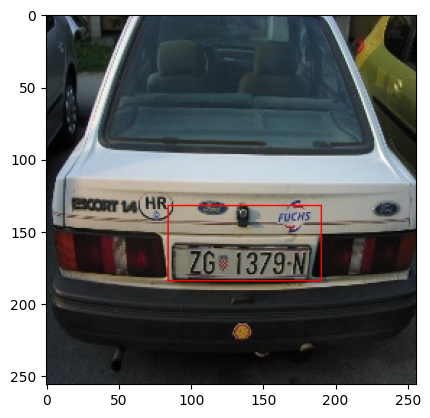

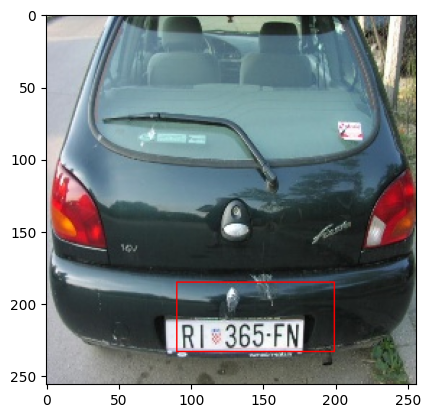

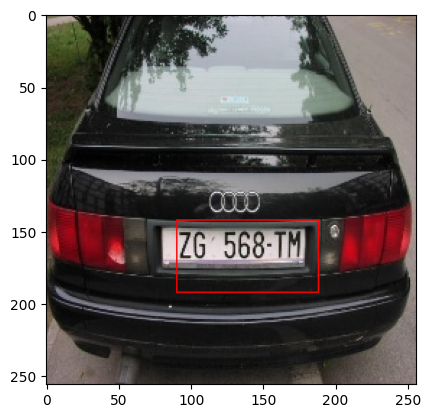

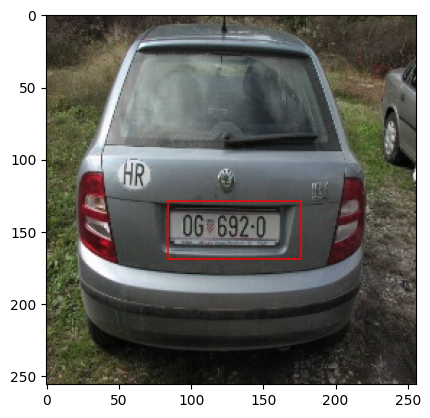

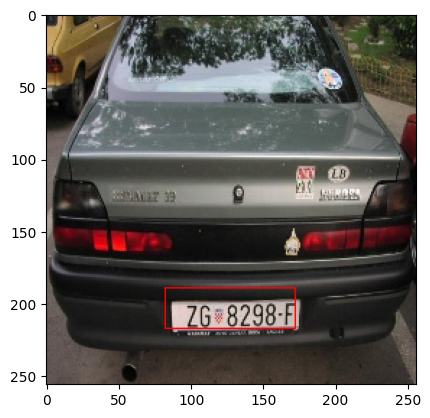

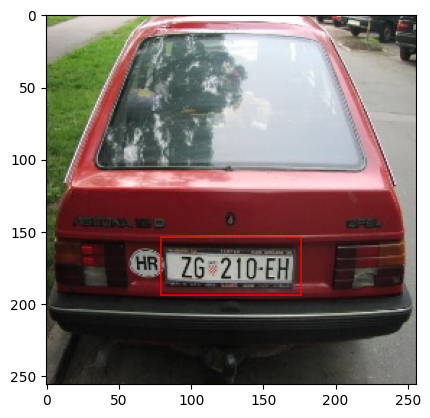

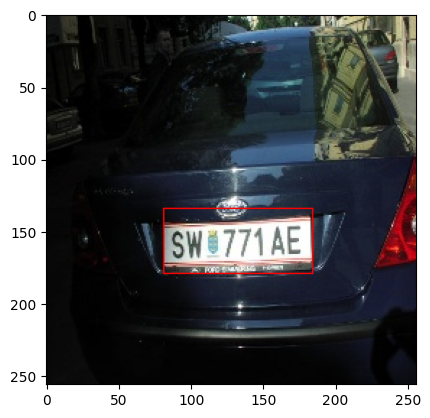

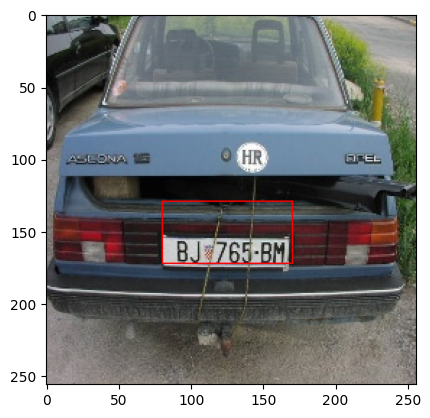

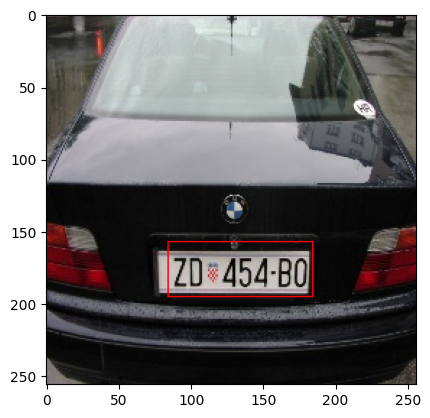

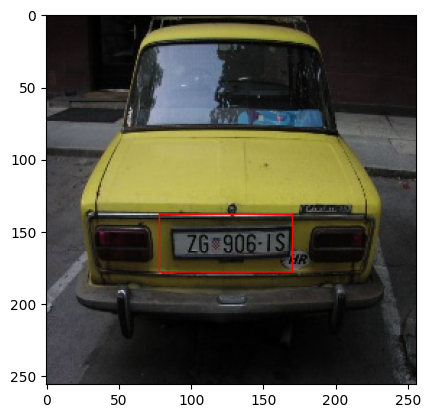

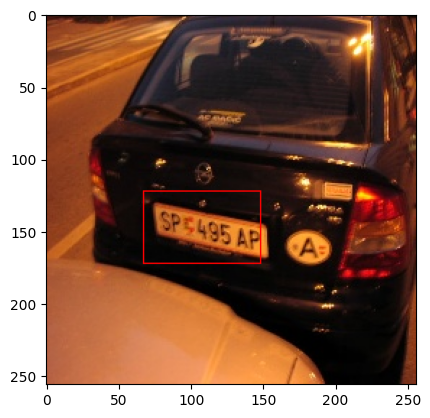

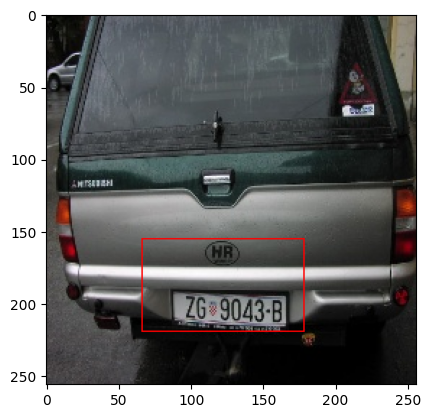

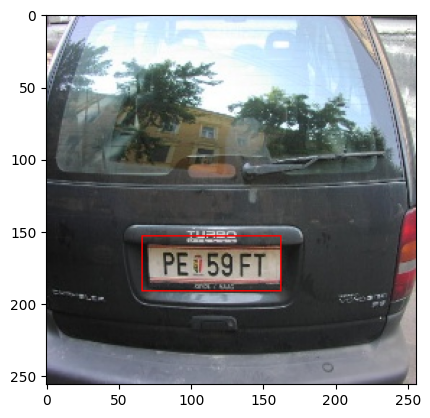

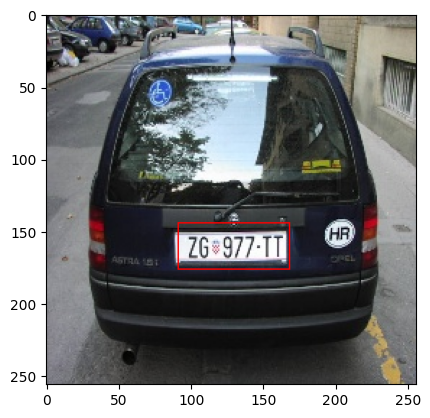

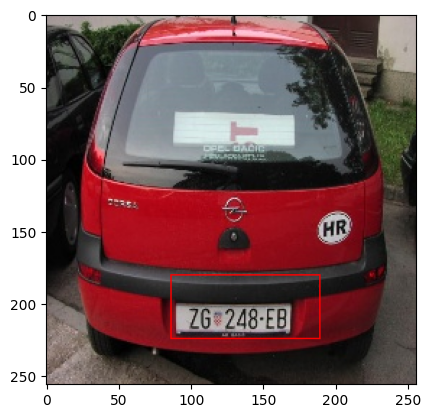

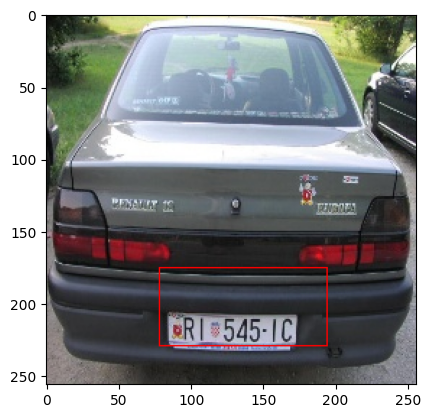

In [36]:
from src.visualization.visualize import show_image
import numpy as np
from shapely.geometry import box
import cv2
import matplotlib.pyplot as plt
train_set = get_dataset("train")
validation_set = get_dataset("validation")

batch = list(train_set.take(1))[0]
images, annotations = batch[0], batch[1]

for (image, annotation) in zip(images[:], annotations[:]):
    #bbox = box(*annotation.numpy())
    #show_image(image, bbox)

    image = image.numpy().astype(np.uint8)
    cv2.rectangle(image, (int(annotation[2]), int(annotation[3])), (int(annotation[0]), int(annotation[1])), color=(255, 0, 0))        
    plt.figure()
    plt.imshow(image)